In [20]:
# 3. Precision & Recall (정밀도 & 재현율)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# a function that prints accuracy, precision, recall, and confusion matrix
def get_clf_eval(y_test, pred):
    matrix = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix: ')
    print(matrix)
    print('Accuracy = {0:.4f}, Precision = {1:.4f}, Recall = {2:.4f}'.format(accuracy, precision, recall))

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ------- From chapter2 example -------
from chapter2.transform_titanic_df import transform_features
#-----------------------------

titanic_df = pd.read_csv('C:/Users/minjo/MLdata/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(max_iter = 120)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

Confusion Matrix: 
[[104  14]
 [ 13  48]]
Accuracy = 0.8492, Precision = 0.7742, Recall = 0.7869


In [22]:
# predict_proba(): returns array with probabilities of each row's prediction
# column0: prob. of prediction being 0 (false), column1: prob. of prediction being 1 (true)
pred_proba = lr_clf.predict_proba(X_test)
print('Probabilities of each row: \n', pred_proba[:5])
print('Final Prediction of each row: \n', pred[:5])

Probabilities of each row: 
 [[0.46228984 0.53771016]
 [0.87873308 0.12126692]
 [0.8772212  0.1227788 ]
 [0.88255292 0.11744708]
 [0.85543445 0.14456555]]
Final Prediction of each row: 
 [1 0 0 0 0]


In [23]:
# have a look at <precision vs. recall> on various thresholds
from sklearn.preprocessing import Binarizer  # makes a binary prediction based on the threshold
def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    # pred_proba_c1: probabilities of each row being 1
    for my_threshold in thresholds:
        binarizer = Binarizer(threshold=my_threshold).fit(pred_proba_1)
        pred = binarizer.transform(pred_proba_1)
        print('Threshold = ', my_threshold)
        get_clf_eval(y_test, pred)
        print()

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

Threshold =  0.4
Confusion Matrix: 
[[98 20]
 [10 51]]
Accuracy = 0.8324, Precision = 0.7183, Recall = 0.8361

Threshold =  0.45
Confusion Matrix: 
[[103  15]
 [ 12  49]]
Accuracy = 0.8492, Precision = 0.7656, Recall = 0.8033

Threshold =  0.5
Confusion Matrix: 
[[104  14]
 [ 13  48]]
Accuracy = 0.8492, Precision = 0.7742, Recall = 0.7869

Threshold =  0.55
Confusion Matrix: 
[[109   9]
 [ 15  46]]
Accuracy = 0.8659, Precision = 0.8364, Recall = 0.7541

Threshold =  0.6
Confusion Matrix: 
[[112   6]
 [ 16  45]]
Accuracy = 0.8771, Precision = 0.8824, Recall = 0.7377



In [24]:
# Trade-off between Precision vs. Recall
import numpy as np
from sklearn.metrics import precision_recall_curve  # automatically computes with various thresholds
precisions, recalls, thresholds2 = precision_recall_curve(y_test, pred_proba[:, 1])
thres_idx = np.arange(0, thresholds2.shape[0], 15)
print('Indexes selected: ', thres_idx)
print('Selected thresholds: ', np.round(thresholds2[thres_idx], 4))
print('Precisions matching: ', np.round(precisions[thres_idx], 4))
print('Recalls matching:    ', np.round(recalls[thres_idx], 4))

Indexes selected:  [  0  15  30  45  60  75  90 105 120 135]
Selected thresholds:  [0.1039 0.1213 0.1404 0.1861 0.2806 0.4034 0.5634 0.6667 0.8218 0.9472]
Precisions matching:  [0.3885 0.4403 0.4661 0.5392 0.6471 0.7286 0.8364 0.9487 0.9583 1.    ]
Recalls matching:     [1.     0.9672 0.9016 0.9016 0.9016 0.8361 0.7541 0.6066 0.377  0.1475]


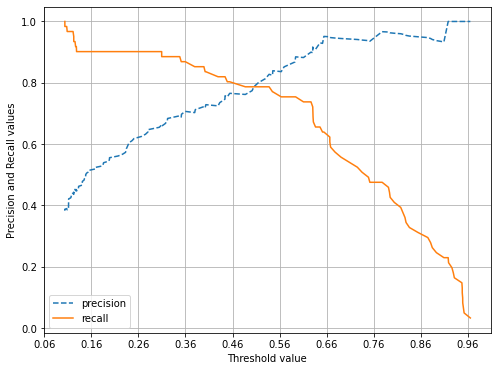

In [25]:
# Have a look at this with a graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8, 6))
    num_of_thresholds = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:num_of_thresholds], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:num_of_thresholds], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall values')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, pred_proba[:, 1])
